<a href="https://colab.research.google.com/github/RomanBr89/HW2/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Файл успешно загружен")
        return df
    except Exception as e:
        print(f"Ошибка при загрузке CSV: {e}")
        return None

In [2]:
import pandas as pd

# Глобальные переменные для названий колонок
time_spend = '8. What is the average time you spend on social media every day?'
sleep_problem = '20. On a scale of 1 to 5, how often do you face issues regarding sleep?'

def convert_social_time(df, column):
    time_order = {
        'Less than an Hour': 1,
        'Between 1 and 2 hours': 2,
        'Between 2 and 3 hours': 3,
        'Between 3 and 4 hours': 4,
        'Between 4 and 5 hours': 5,
        'More than 5 hours': 6
    }
    df['social_time_num'] = df[column].map(time_order)
    return df

def check_missing(df, columns):
    missing = df[columns].isnull().sum()
    print("Пропущенные значения по колонкам:")
    print(missing)
    return missing

def fill_missing(df, column, method='mean'):
    if method == 'mean':
        df[column] = df[column].fillna(df[column].mean())
    elif method == 'median':
        df[column] = df[column].fillna(df[column].median())
    return df

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_histogram(df, column, bins=10):
    plt.hist(df[column].dropna(), bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Гистограмма для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

def add_scatter(df, x_column, y_column):
    plt.scatter(df[x_column], df[y_column], alpha=0.7)
    plt.title(f'Диаграмма рассеяния: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

def add_boxplot(df, x_column, y_column):
    plt.figure(figsize=(8,6))
    sns.boxplot(x=x_column, y=y_column, data=df)
    plt.title(f'Boxplot: {y_column} по {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()


Файл успешно загружен
Пропущенные значения по колонкам:
social_time_num                                                            0
20. On a scale of 1 to 5, how often do you face issues regarding sleep?    0
dtype: int64

Модель: linear
MSE: 2.10, R²: 0.03


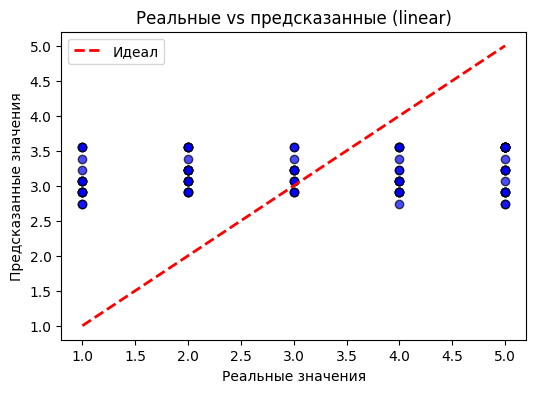


Модель: tree
MSE: 2.20, R²: -0.01


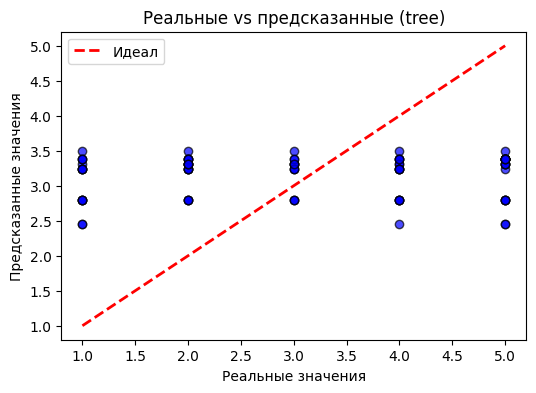


Модель: forest
MSE: 2.20, R²: -0.01


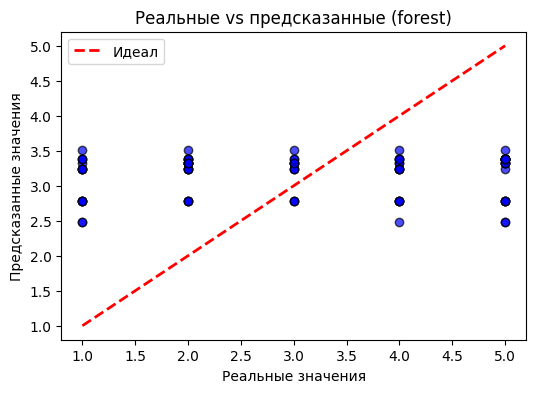

Прогноз при 4 часах в соцсетях (линейная модель): 3.225796342370674


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from data_loader import load_csv
from data_processing import convert_social_time, time_spend, sleep_problem, check_missing, fill_missing

def prepare_data(file_path):
    df = load_csv(file_path)
    df = convert_social_time(df, time_spend)
    check_missing(df, ['social_time_num', sleep_problem])
    df = fill_missing(df, 'social_time_num', method='median')
    df = fill_missing(df, sleep_problem, method='median')
    return df

def train_and_plot(df, feature_col='social_time_num', target_col=None, model_type="linear"):
    if target_col is None:
        target_col = sleep_problem

    X = df[[feature_col]]
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if model_type == "linear":
        model = LinearRegression()
    elif model_type == "tree":
        model = DecisionTreeRegressor(random_state=42)
    elif model_type == "forest":
        model = RandomForestRegressor(random_state=42, n_estimators=100)
    else:
        raise ValueError("model_type должен быть 'linear', 'tree' или 'forest'")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nМодель: {model_type}")
    print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, color="blue", alpha=0.7, edgecolor="black")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Идеал")
    plt.xlabel("Реальные значения")
    plt.ylabel("Предсказанные значения")
    plt.title(f"Реальные vs предсказанные ({model_type})")
    plt.legend()
    plt.show()

    return model

def predict(model, value):
    new_data = pd.DataFrame({'social_time_num': [value]})
    return model.predict(new_data)[0]

if __name__ == "__main__":
    file_path = 'smmhdataset.csv'
    df = prepare_data(file_path)

    model_linear = train_and_plot(df, model_type="linear")
    model_tree = train_and_plot(df, model_type="tree")
    model_forest = train_and_plot(df, model_type="forest")

    print("Прогноз при 4 часах в соцсетях (линейная модель):", predict(model_linear, 4))